# Analysis Of Variance (ANOVA)

### Definition

ANOVA is a parametric test (it has parameter estimates) used when the researcher wants to verify if there are differences between the means of a certain variable (response variable) in relation to a treatment with two or more categorical levels (predictive variable). The t test is also used in this type of procedure (with a maximum of two levels), but ANOVA is indicated for analyzes with an “n” sample greater than 30.

### Assumptions

* Independent samples – this means that an observation cannot be influenced by the previous one or the next one. This assumption ensures that data are collected randomly within the sample space.

* Homogeneity of variances between groups – the variance within each group is equal (or at least approximately) to that within all groups. In this way, each treatment contributes equally to the sum of squares.

* Residuals follow a normal distribution – it is assumed that the general mean of the residuals is equal to zero, that is, they are normally distributed. This assumption is not very restrictive depending on the sample size.


Independentemente do tipo de teste de hipótese estatística que você está realizando, existem cinco etapas principais para executá-los:

1. Configure uma hipótese nula e alternativa
2. Escolha um nível de significância α (ou use aquele atribuído)
3. Determine o valor crítico da estatística de teste ou valor p (encontre a região de rejeição para a hipótese nula)
4. Calcule o valor da estatística de teste
5. Compare o valor da estatística de teste com o valor da estatística de teste crítica para rejeitar a hipótese nula ou não



 
2 . Escolha um nível de significância α (ou use aquele atribuído)


 
O nível de significância α é o limite no qual você aceita rejeitar a hipótese nula. É a probabilidade de rejeitar a hipótese nula quando ela for verdadeira. Um nível de significância de 0,05 é mais comum, isso indica que você está bem em rejeitar a hipótese nula se houver menos de 5% de chance de que o resultado que estou vendo seja realmente devido à aleatoriedade.

3. Determine o valor crítico (encontre a região de rejeição para a hipótese nula)

O valor crítico é um valor na distribuição de teste em comparação com a estatística de teste para determinar se a hipótese nula deve ser rejeitada.

4. Calcule a estatística de teste ou valor p

A estatística de teste é um valor calculado a partir dos dados fornecidos e, em seguida, comparado ao valor crítico para determinar se a hipótese nula deve ser rejeitada.

O valor p é a probabilidade de observar uma estatística de teste pelo menos tão grande quanto a observada, por acaso, dada a hipótese nula ser verdadeira.

Como sabemos que tipo de estatística de teste calcular? Depende do tipo de teste de hipótese que executamos. Existem quatro tipos: teste z, teste t, ANOVA e testes qui-quadrado. Um teste z é usado ao comparar as médias da população e quando o desvio padrão da população é conhecido. Um teste t é usado ao comparar as médias populacionais e o desvio padrão populacional não é conhecido. Uma ANOVA é usada ao comparar as médias da amostra entre três ou mais grupos. Por último, um teste de qui-quadrado é um teste não paramétrico usado para testar relacionamentos entre variáveis ​​categóricas.

5. Compare o valor da estatística de teste com o valor da estatística de teste crítica, ou valor p com o nível de significância, para determinar se deve rejeitar a hipótese nula ou não

Se a estatística de teste for maior do que o valor crítico, rejeitamos a hipótese nula. Se a estatística de teste for menor ou igual ao valor crítico, não rejeitamos a hipótese nula.

Se p <α , rejeitamos a hipótese nula. Se p ≥ α, deixamos de rejeitar a hipótese nula.

E aí está, cinco etapas para conduzir o teste de hipótese, então agora vamos conduzir alguns testes de hipótese em Python usando SciPy .

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [5]:
# Using the pandas library to import data
df_1 = pd.read_csv('Datasets//ToddlerAutism.csv',engine='python', sep=',')

### Toddler data Description

Source: Fayez Thabtah
Department of Digital Technology
Manukau Institute of Technology,
Auckland, New Zealand
fadi.fayez@manukau.ac.nz

* Data Type: Predictive and Descriptive: Nominal / categorical, binary and continuous 
* Task: Classification
* Attribute Type: Categorical, continuous and binary  
* Area: Medical, health and social science
* Format Type: Non-Matrix
* Does your data set contain missing values? No
* Number of Instances (records in your data set): 1054
* Number of Attributes (fields within each record): 18 including the class variable 
* Attribute Information:  For Further information about the attributes/feature see below table.


In [6]:
#Renaming the columns
df = df_1.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [12]:
# # Checking statistical details of the dataset
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,543.781593,0.730769,0.603022,0.535714,0.681319,0.712912,0.765110,0.829670,0.601648,0.682692,0.645604,28.223901,6.788462
std,291.080202,0.443865,0.489608,0.499066,0.466286,0.452714,0.424222,0.376181,0.489895,0.465748,0.478659,7.491995,1.921937
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,4.000000
25%,302.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24.000000,5.000000
50%,544.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,7.000000
75%,789.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [16]:
# Checking dimensions
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

In [14]:
# Understanding the dataset, columns, data types, number of records per column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 1 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 728 non-null    int64 
 1   A1                      728 non-null    int64 
 2   A2                      728 non-null    int64 
 3   A3                      728 non-null    int64 
 4   A4                      728 non-null    int64 
 5   A5                      728 non-null    int64 
 6   A6                      728 non-null    int64 
 7   A7                      728 non-null    int64 
 8   A8                      728 non-null    int64 
 9   A9                      728 non-null    int64 
 10  A10                     728 non-null    int64 
 11  Age                     728 non-null    int64 
 12  qchat_score             728 non-null    int64 
 13  Sex                     728 non-null    object
 14  Ethnicity               728 non-null    object
 15  Jaund

In [17]:
# check for null values
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age                       0
qchat_score               0
Sex                       0
Ethnicity                 0
Jaundice                  0
family_asd                0
Who completed the test    0
asd_traits                0
dtype: int64

## 1 . Set up a null and alternative hypothesis

Null hypothesis: can be considered the “control” of the experiment. The hypothesis is assumed to be true before we collect the data and usually has some kind of equal sign (≥, ≤, =).

Alternative hypothesis: it can be thought of as the “experiment”. This is what we want to prove to be true with our collected data and it usually has the opposite sign to the null hypothesis.

### 1.1 Independent t-test

What is Statistical Significance Test?
In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

T-tests are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution. 

The function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.

Alpha value is the level of significance - It is usually taken as 0.01, 0.05, or 0.1.

P value tells how close to extreme the data actually is. P value and alpha values are compared to establish the statistical significance. If p value <= alpha we reject the null hypothesis and say that the data is statistically significant. otherwise we accept the null hypothesis.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php


Next we will compare some groups:

*** 
'Sex' vs 'qchat_score'

- Null Hypothesis: There is no statisical difference between male and female mean qchat scores.

- Alternative Hypothesis: There is a statistical difference between male and female mean qchat scores.

***

In [39]:
# Separate gender into two df's for independent T-test
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

In [42]:
# Showing female dataset
female_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
13,14,1,1,1,1,0,0,1,0,1,1,15,7,f,middle eastern,yes,no,family member,Yes
17,18,1,1,1,0,1,1,1,1,0,1,12,8,f,middle eastern,yes,no,family member,Yes
19,20,1,1,1,0,1,0,1,1,0,1,12,7,f,black,no,no,family member,Yes
35,36,1,1,1,1,1,1,1,1,1,1,15,10,f,middle eastern,no,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1029,0,0,1,1,1,1,0,0,1,0,22,5,f,Latino,no,no,family member,Yes
1031,1032,1,1,0,0,0,1,1,1,0,1,36,6,f,Others,no,yes,family member,Yes
1036,1037,1,1,0,1,0,1,1,1,0,0,14,6,f,asian,no,no,family member,Yes
1046,1047,0,1,0,1,1,1,1,1,1,0,24,7,f,middle eastern,no,no,family member,Yes


In [41]:
# Showing male dataset
male_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,1,1,1,1,1,1,1,1,1,1,25,10,m,asian,no,yes,family member,Yes
1045,1046,1,1,1,1,1,1,1,1,1,1,30,10,m,middle eastern,no,no,Health Care Professional,Yes
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes


In [23]:
## Descriptive asd traits separated by gender
df.groupby('Sex').asd_traits.describe()

,count,unique,top,freq
Sex,,,,
f,194,1,Yes,194
m,534,1,Yes,534


In [38]:
# Independent T-test of gender and qchat-score
print(stats.ttest_ind(male_df['qchat_score'], female_df['qchat_score'], equal_var=False))
print("-------------------------------------------------------------------------")
print('We fail to reject the null hypothesis since our p-value is more than 0.05')

Ttest_indResult(statistic=-0.3602431012464004, pvalue=0.7188758523230369)
-------------------------------------------------------------------------
We fail to reject the null hypothesis since our p-value is more than 0.05


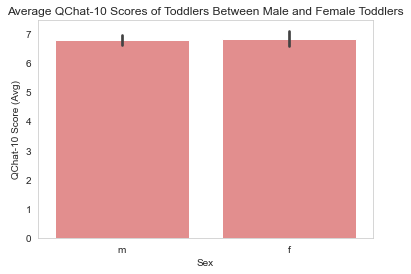

In [44]:
# Plotting Average QChat-10 Scores of Toddlers Between Male and Female Toddlers
sns.set_style("whitegrid",{'axes.grid' : False})
ax = sns.barplot(x = 'Sex', y = 'qchat_score', data = df, color='lightcoral')
ax.set_title('Average QChat-10 Scores of Toddlers Between Male and Female Toddlers')
ax.set_xlabel('Sex')
ax.set_ylabel('QChat-10 Score (Avg)')
plt.savefig('sex_qchat_score.png')
plt.show()